06:16:19 - cmdstanpy - INFO - Chain [1] start processing
06:16:20 - cmdstanpy - INFO - Chain [1] done processing


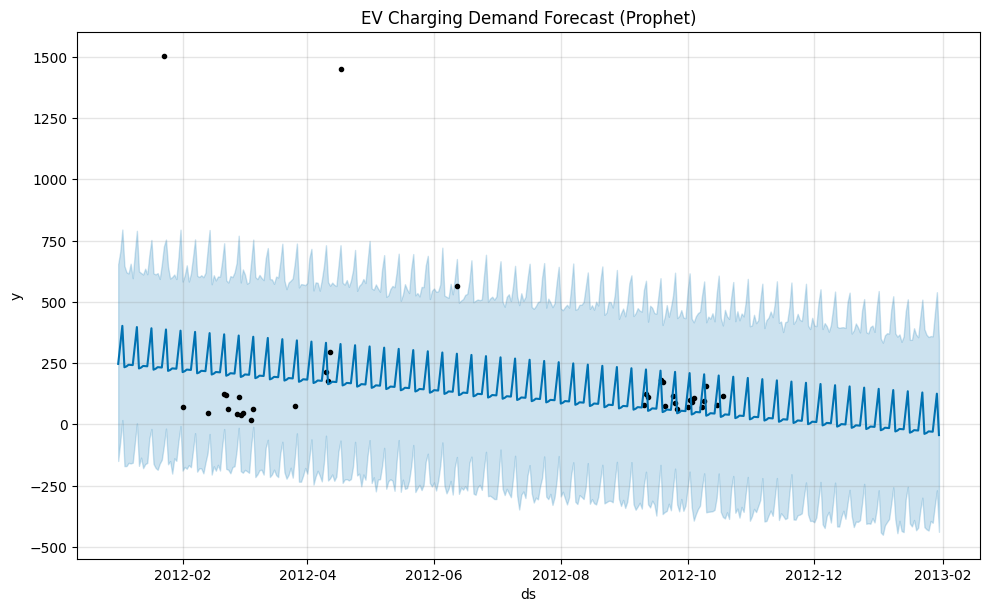

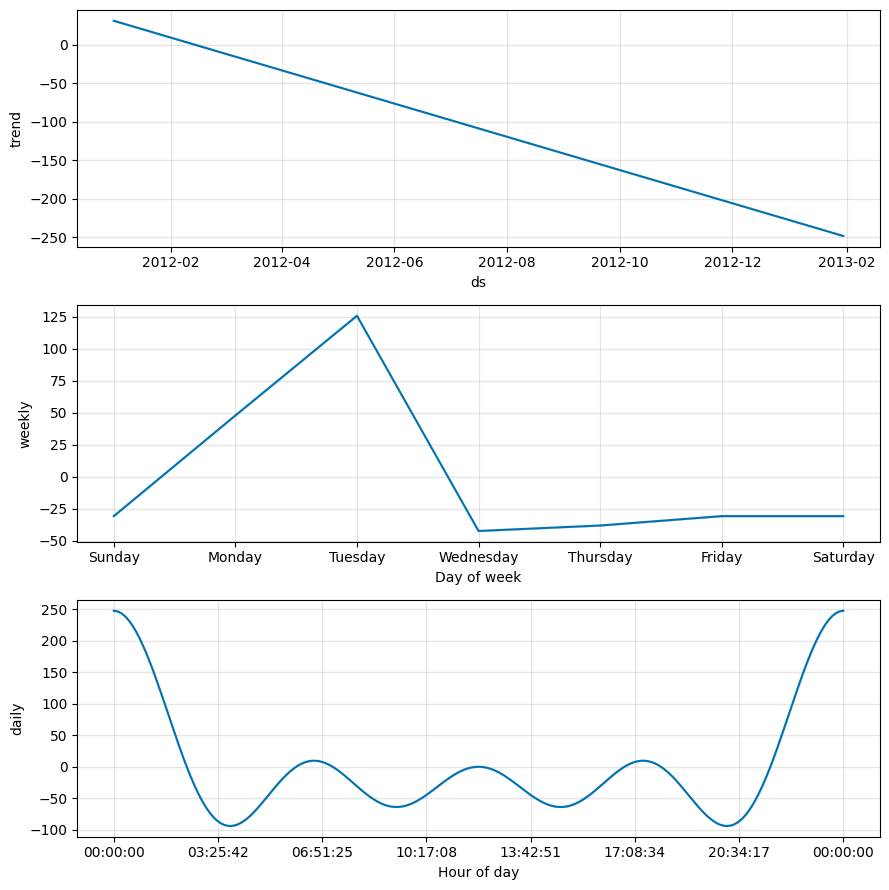

In [3]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# --- Load merged data ---
df = pd.read_csv("merged_weather_traffic.csv")
df['Date'] = pd.to_datetime(df['Date'])

# --- Simulate EV charging demand ---
df['Estimated_Demand_kWh'] = (
    df['Avg Traffic Volume'] * 0.05 +
    df['Temp_C'] * 2 +
    np.random.normal(0, 5, size=len(df))  # Add some noise
)

# --- Prepare for Prophet ---
demand_df = df[['Date', 'Estimated_Demand_kWh']].rename(columns={
    'Date': 'ds',
    'Estimated_Demand_kWh': 'y'
})

# --- Fit Prophet model ---
model = Prophet(daily_seasonality=True)
model.fit(demand_df)

# --- Forecast 30 days ahead ---
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# --- Plot results ---
model.plot(forecast)
plt.title("EV Charging Demand Forecast (Prophet)")
plt.show()

# Optional: Plot trend & seasonality components
model.plot_components(forecast)
plt.show()


In [5]:
# Save forecast to CSV for Tableau
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_output.csv', index=False)
print("✅ Forecast saved to 'forecast_output.csv'")


✅ Forecast saved to 'forecast_output.csv'
